In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [2]:
input_texts = []
target_characters = []
target_tokens_dadagp = ['\n']
target_tokens = [':','\n']
target_tokens_dig = [':','\n']
for i in range(10):
    target_tokens_dig.append(str(i))

targets = [target_characters, target_tokens, target_tokens_dig, target_tokens_dadagp]
data_path = "./sample"
song_dir = os.listdir(data_path)

In [3]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

In [4]:
#input_texts will contain all measures but the last one, for every song, while the target_texts will be composed 
#of all measures expect the first one. In this way, target text represents the measure following the input one.
for song in song_dir:
    measures = os.listdir("{}/{}".format(data_path,song))
    for i in range(1,len(measures)):
        #gathering of input texts
        input_file = open("{}/{}/{}.measure_{}.txt".format(data_path,song,song,i))
        input_text = input_file.read()
        dadagp_tokens = input_text.split('\n')
        tokens = filter(None, re.split("[:,\n]+", input_text))
        input_texts.append(input_text)
        
        #we list all the characters that exist in our dataset
        for char in input_text:
            if char not in target_characters:
                target_characters.append(char)
        
        for token in tokens:
            if token not in target_tokens:
                target_tokens.append(token)
                if not is_number(token):
                    target_tokens_dig.append(token)
        for token in dadagp_tokens:
            if token not in target_tokens_dadagp:
                target_tokens_dadagp.append(token)

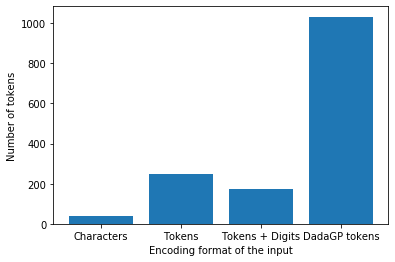

In [5]:
X = ["Characters","Tokens","Tokens + Digits","DadaGP tokens"]
Y_tokens = [len(i) for i in targets]

plt.bar(X,Y_tokens)
plt.xlabel("Encoding format of the input")
plt.ylabel("Number of tokens")
plt.show()

In [6]:
def count_tokens(text, target):
    count = 0
    token = ''
    for char in text:
        token+=char
        if token in target:
            count+=1
            token = ''
    return count

def max_tokens(texts, target):
    return np.max([count_tokens(text, target) for text in texts])

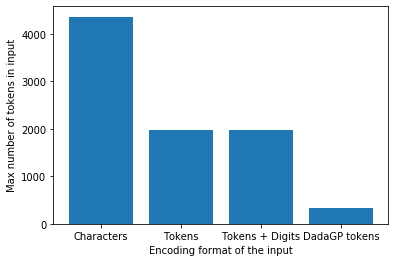

In [7]:
Y_max = [max_tokens(input_texts, target) for target in targets]

plt.bar(X,Y_max)
plt.xlabel("Encoding format of the input")
plt.ylabel("Max number of tokens in input")
plt.show()

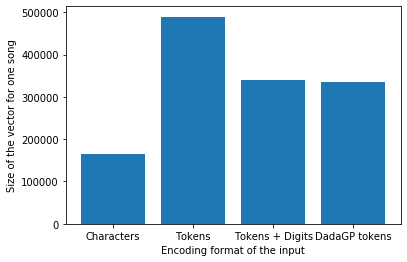

In [8]:
Y_vector_size = [max_tokens(input_texts, target)*len(target) for target in targets]

plt.bar(X,Y_vector_size)
plt.xlabel("Encoding format of the input")
plt.ylabel("Size of the vector for one song")
plt.show()